# HOG

## Imports

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
def compute_hog(img, cell_size=16, bin_size=16):
    img = np.sqrt(img / float(np.max(img))) * 255 #Normalizing Pixel Values
    #Extract height and with of image
    height, width = img.shape
    # Apply Sobel Operator to compute Gradient
    gradient_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    gradient_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    #Calculate Magnitude of Gradient and Weight
    magnitude = cv2.addWeighted(gradient_x, 0.5, gradient_y, 0.5, 0)
    angle = cv2.phase(gradient_x, gradient_y, angleInDegrees=True)
    # Divide Image into Cells
    angle_unit = 360 / bin_size
    cell_gradient_vector = np.zeros((height // cell_size, width // cell_size, bin_size))
    for i in range(cell_gradient_vector.shape[0]):
      for j in range(cell_gradient_vector.shape[1]):
        cell_mag = magnitude[i * cell_size:(i + 1) * cell_size, j * cell_size:(j + 1) * cell_size]
        cell_angle = angle[i * cell_size:(i + 1) * cell_size, j * cell_size:(j + 1) * cell_size]

        orientation_centers = np.zeros(bin_size)

        #Assigns gradient strengths to orientation bins.

        #Uses bilinear interpolation to distribute values between the two closest bins.
        for x in range(cell_mag.shape[0]):
          for y in range(cell_mag.shape[1]):
            strength = cell_mag[x, y]
            ang = cell_angle[x, y]
            bin_idx = int(ang / angle_unit) % bin_size
            next_bin = (bin_idx + 1) % bin_size
            mod = ang % angle_unit

            orientation_centers[bin_idx] += strength * (1 - (mod / angle_unit))
            orientation_centers[next_bin] += strength * (mod / angle_unit)

        cell_gradient_vector[i, j] = orientation_centers

    return render_gradient(np.zeros([height, width]), cell_gradient_vector, cell_size, angle_unit)


In [ ]:
def render_gradient(image, cell_gradient, cell_size, angle_unit):
    cell_width = cell_size / 2
    max_mag = np.max(cell_gradient)
    for x in range(cell_gradient.shape[0]):
        for y in range(cell_gradient.shape[1]):
            cell_grad = cell_gradient[x, y] / max_mag
            angle = 0
            for magnitude in cell_grad:
              magnitude = max(magnitude, 0)  # Clip negative values to 0
              radian = math.radians(angle)
              x1 = int(x * cell_size + magnitude * cell_width * math.cos(radian))
              y1 = int(y * cell_size + magnitude * cell_width * math.sin(radian))
              x2 = int(x * cell_size - magnitude * cell_width * math.cos(radian))
              y2 = int(y * cell_size - magnitude * cell_width * math.sin(radian))
              cv2.line(image, (y1, x1), (y2, x2), int(255 * math.sqrt(magnitude)))
              angle += angle_unit
    return image

In [ ]:
img = cv2.imread('pedestrin.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
hog_image  = compute_hog(img)

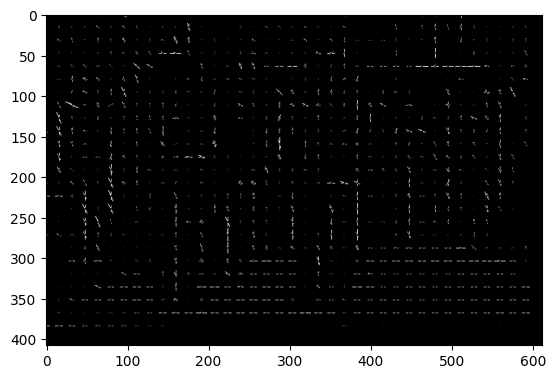

In [ ]:
plt.imshow(hog_image, cmap='gray')
plt.show()

array([[210, 195, 176, ...,  57,  58,  58],
       [198, 190, 176, ...,  58,  59,  59],
       [196, 197, 189, ...,  60,  61,  61],
       ...,
       [ 99, 108, 108, ..., 126, 117, 107],
       [104, 103,  98, ..., 106, 110, 111],
       [111, 101,  90, ..., 112, 123, 123]], dtype=uint8)
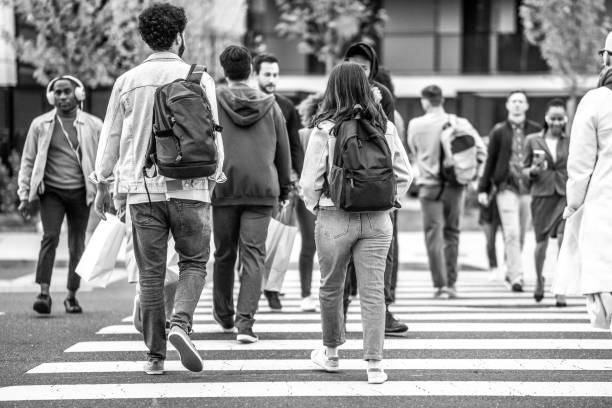

In [ ]:
img